# Group 1
## MSBA 286
### Code Author: Bala Gaurav Reddy Pasam

In [3]:
# Step 1: Load and Clean the Data

# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
# Managerial Implication: This dataset contains historical customer data we’ll use to predict CLV.
file_path = r"D:\UNIVERSITY OF PACIFIC\MSBA 286\Final Project\MSBA 286 Final Project Data.xlsx"
data = pd.read_excel(file_path)

# Drop irrelevant columns (e.g., 'Customer' is an identifier with no predictive value)
# Managerial Implication: By removing useless columns, we focus on actionable variables that impact CLV.
data_cleaned = data.drop(columns=['Customer'], axis=1)

# Encode categorical variables into numerical formats (One-Hot Encoding)
# Why? Machine learning models can’t directly process text data, so we convert it to numbers.
categorical_columns = ['State', 'Response', 'Coverage', 'Education', 'EmploymentStatus',
                       'Gender', 'Location Code', 'Marital Status', 'Policy Type',
                       'Policy', 'Renew Offer Type', 'Sales Channel', 'Vehicle Class', 'Vehicle Size']
data_encoded = pd.get_dummies(data_cleaned, columns=categorical_columns, drop_first=True)

# Normalize numerical features for consistency
# Why? Scaling ensures all numerical values are on a comparable scale, improving model performance.
numerical_columns = ['Income', 'Monthly Premium Auto', 'Months Since Last Claim',
                     'Months Since Policy Inception', 'Number of Open Complaints',
                     'Number of Policies', 'Total Claim Amount']
data_encoded[numerical_columns] = (data_encoded[numerical_columns] - data_encoded[numerical_columns].mean()) / data_encoded[numerical_columns].std()

# Check the structure of the cleaned dataset
# Managerial Implication: Clean, consistent data ensures accurate predictions and meaningful insights.
print(data_encoded.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 53 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Customer Lifetime Value         9134 non-null   float64
 1   Effective To Date               9134 non-null   object 
 2   Income                          9134 non-null   float64
 3   Monthly Premium Auto            9134 non-null   float64
 4   Months Since Last Claim         9134 non-null   float64
 5   Months Since Policy Inception   9134 non-null   float64
 6   Number of Open Complaints       9134 non-null   float64
 7   Number of Policies              9134 non-null   float64
 8   Total Claim Amount              9134 non-null   float64
 9   State_California                9134 non-null   bool   
 10  State_Nevada                    9134 non-null   bool   
 11  State_Oregon                    9134 non-null   bool   
 12  State_Washington                91

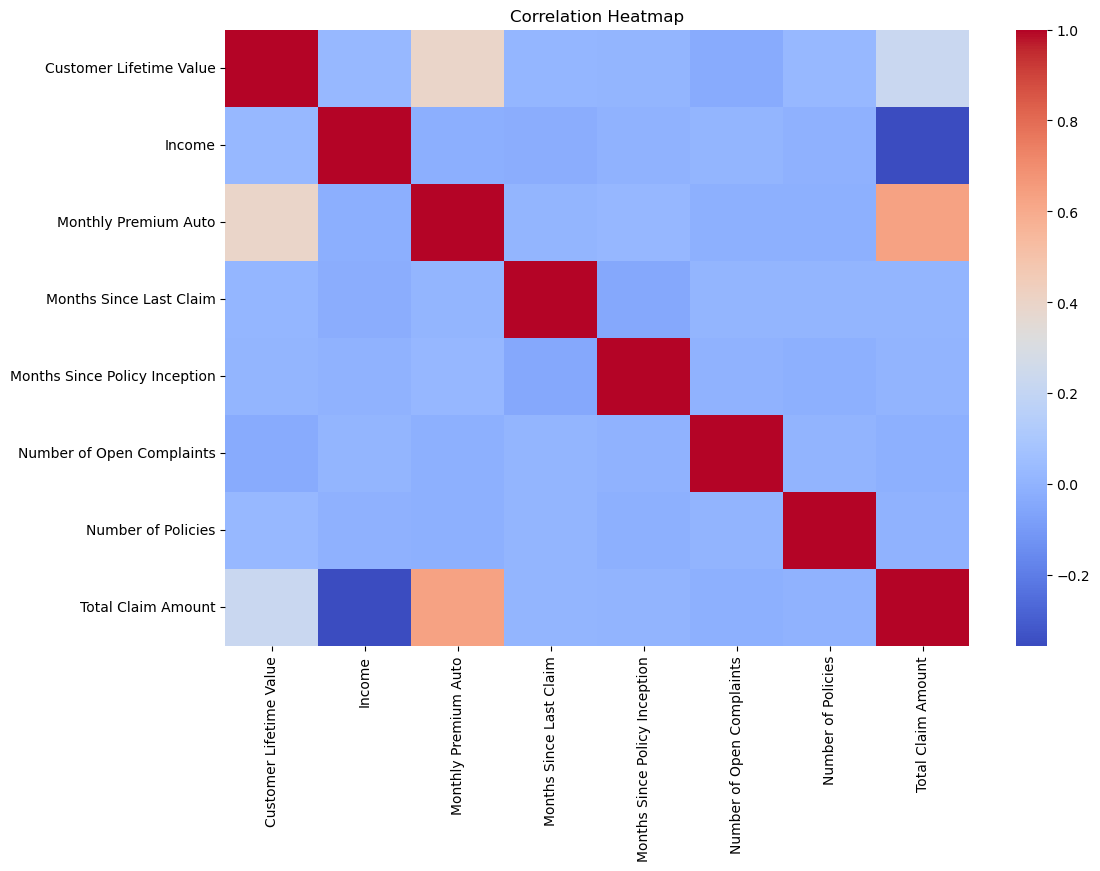

In [5]:
# Step 2: Exploratory Data Analysis (EDA)

# Filter only numeric columns from the dataset
# Why? Correlation matrices require numeric values to calculate relationships. Columns like "Effective To Date" (datetime) or encoded categories are not relevant here.
numeric_data = data_encoded.select_dtypes(include=['number'])

# Plot the correlation heatmap
# Why? This shows how strongly features are related to Customer Lifetime Value (CLV).
# Managerial Implication: Identify the key drivers of CLV (e.g., Monthly Premium Auto, Total Claim Amount) to focus on factors impacting customer value.
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_data.corr(), annot=False, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()



In [6]:
# Step 3: Model Training

# Split data into features (X) and target (y)
# X: Independent variables (e.g., income, policy type, etc.)
# y: Dependent variable (Customer Lifetime Value we want to predict)
X = data_encoded.drop(['Customer Lifetime Value', 'Effective To Date'], axis=1)
y = data_encoded['Customer Lifetime Value']

# Train-test split (80-20 split)
# Why? Splitting ensures the model learns from training data and is evaluated on unseen test data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest model
# Why? Random Forest is robust and handles complex data well without overfitting.
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Evaluate the model on test data
# MAE (Mean Absolute Error): Measures how far off predictions are on average.
# R² Score: Indicates how much variance in CLV is explained by the model (higher is better).
y_pred = model.predict(X_test)
print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

# Managerial Implication: Accurate predictions let businesses focus on retaining high-value customers.


Mean Absolute Error (MAE): 1473.8469485605506
R² Score: 0.6897674423512135


In [8]:
# Step 4: Export Predicted Results with All Columns in One File

# Add predicted CLV to the original dataset
data_cleaned['Predicted CLV'] = model.predict(X)

# Save the updated dataset with all original columns
# Why? This allows you to use any column in Tableau for charts without needing calculated fields.

# Define the folder path to save the file
save_path = r"D:\UNIVERSITY OF PACIFIC\MSBA 286\Final Project"

# Save the dataset
file_name = "Final_Predicted_CLV_Full.csv"
full_path = f"{save_path}\{file_name}"
data_cleaned.to_csv(full_path, index=False)

# Confirmation message
print(f"Final dataset saved with all columns to: {full_path}")



Final dataset saved with all columns to: D:\UNIVERSITY OF PACIFIC\MSBA 286\Final Project\Final_Predicted_CLV_Full.csv
